In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy,MeanSquaredError

## Logistic Regression

#### Neuron with Sigmoid activation
The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic  regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$ 

Let's set $w$ and $b$ to some known values and check the model.

In [3]:
X_train = np.array([0.,1,2,3,4,5], dtype=np.float32).reshape(-1,1)
Y_train = np.array([0,0,0,1,1,1],dtype=np.float32).reshape(-1,1)


In [4]:
pos = Y_train==1
neg = Y_train==0

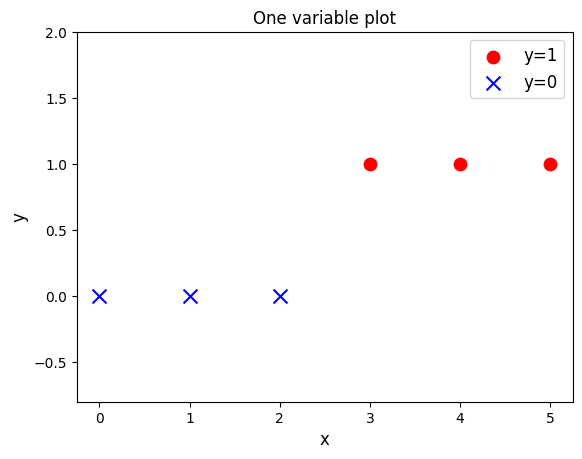

In [5]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_train[pos],Y_train[pos],marker='o',s=80,c='red',label='y=1')
ax.scatter(X_train[neg],Y_train[neg],marker='x',s=100, c='blue',label='y=0')
ax.set_ylim(-0.8,2)
ax.set_ylabel('y',fontsize=12)
ax.set_xlabel('x',fontsize=12)
ax.set_title('One variable plot')
ax.legend(fontsize=12)
plt.show()

## Logistic Neuron

In [6]:
model = Sequential([Dense(units=1, input_dim=1, activation='sigmoid', name='L1')])

c:\Users\aakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[0.80818594]] [0.]
(1, 1) (1,)


#### Lets Set the weight

In [9]:
set_w = np.array([[2]])
set_b= np.array([-4.5])

logistic_layer.set_weights([set_w,set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [10]:
a1= logistic_layer(X_train[0].reshape(1,1))
print(a1)



z=np.dot(X_train[0].reshape(1,1),set_w)+set_b
g_wb = 1/(1+np.exp(-z))
print(g_wb)


tf.Tensor([[0.01098694]], shape=(1, 1), dtype=float32)
[[0.01098694]]


In [11]:
a1=logistic_layer(X_train)
a1

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[0.01098694],
       [0.07585818],
       [0.37754068],
       [0.8175745 ],
       [0.97068775],
       [0.99592984]], dtype=float32)>

In [12]:
z=np.dot(X_train,set_w)+set_b
g_wb = 1/(1+np.exp(-z))
print(g_wb)

[[0.01098694]
 [0.07585818]
 [0.37754067]
 [0.81757448]
 [0.97068777]
 [0.99592986]]


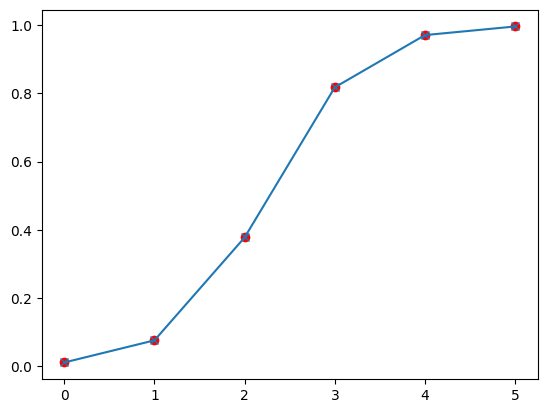

In [15]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_train,a1,marker='o',c='r')
ax.plot(X_train,g_wb,marker='x')
plt.show()
